In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this competition, you are going to predict which business a user is checking into based on their location, accuracy, and timestamp. 
The train and test dataset are split based on time, and the public/private leaderboard in the test data are split randomly. There is no concept of a person in this dataset. All the row_id's are events, not people. 

Note: Some of the columns, such as time and accuracy, are intentionally left vague in their definitions. Please consider them as part of the challenge. 

File descriptions
train.csv, test.csv


row_id: id of the check-in event

x y: coordinates

accuracy: location accuracy 

time: timestamp#

##### place_id: id of the business, this is the ### target you are predicting


sample_submission.csv - a sample submission file in the correct format with random predictions

## Part 1 - Loading data
This will include sampling the data.

In [3]:
df_train = pd.read_csv("D://Eureka.AI//Facebook//all//train.csv")
df_test = pd.read_csv("D://Eureka.AI//Facebook//all//test.csv")
print(df_train.shape)
df_train.head()

(1048575, 6)


,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


# Sample them for quicker visualisations
df_train_sample = df_train.sample(n=100000)
df_test_sample = df_test.sample(n=100000)

In [4]:
place_count=df_train.groupby('place_id')['place_id'].count()


In [5]:
total_place_count=place_count.size
total_place_count

104182

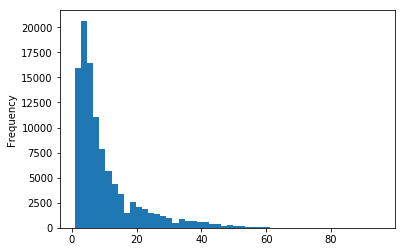

In [6]:
place_count.plot(kind='hist',bins=50)

In [7]:
place_count.describe()

count    104182.000000
mean         10.064838
std          10.127836
min           1.000000
25%           3.000000
50%           6.000000
75%          13.000000
max          95.000000
Name: place_id, dtype: float64

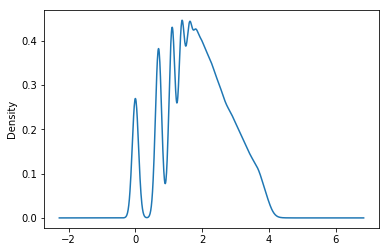

In [8]:
np.log(place_count).plot(kind='kde')

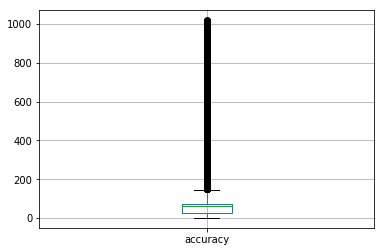

In [9]:
df_train['accuracy'].to_frame().boxplot()
#plt.plot

In [10]:
df_train.accuracy.describe()

count    1.048575e+06
mean     8.282309e+01
std      1.148307e+02
min      1.000000e+00
25%      2.700000e+01
50%      6.200000e+01
75%      7.500000e+01
max      1.019000e+03
Name: accuracy, dtype: float64

There are visible outiers in given 'accuracy' field, now find corelation between variables in dataframe

In [11]:
df_train.corr()

,row_id,x,y,accuracy,time,place_id
row_id,1.000000,0.001179,0.002801,-0.000560,-0.001156,0.000033
x,0.001179,1.000000,-0.002045,0.000064,0.000025,-0.003083
y,0.002801,-0.002045,1.000000,-0.000028,0.001223,-0.004660
accuracy,-0.000560,0.000064,-0.000028,1.000000,0.071057,0.001279
time,-0.001156,0.000025,0.001223,0.071057,1.000000,-0.002830
place_id,0.000033,-0.003083,-0.004660,0.001279,-0.002830,1.000000


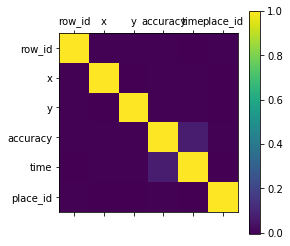

In [12]:
plt.matshow(df_train.corr())
plt.xticks(range(len(df_train.columns)), df_train.columns)
plt.yticks(range(len(df_train.columns)), df_train.columns)
plt.colorbar()
plt.show()

In [ ]:
##pd.scatter_matrix(df_train,diagonal=False,figsize=(8,8))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


## Location Entropy: expected number of users visiting a location

Transpose a given data set in the form of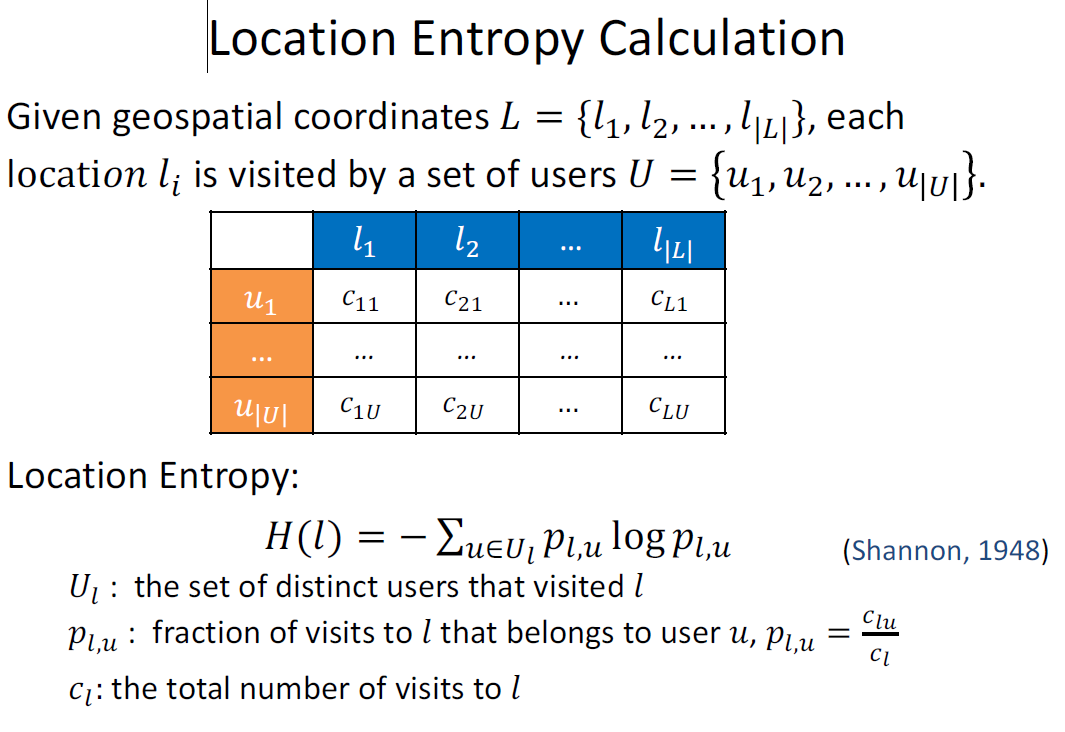

Location Li denoted as Li=(xi, yi) where i=1 to total_place_count
User Ui denoted as Ui=row_id_array of i where i= row_id/s for particular repeated location for example(for location Lm, all                                                                           row_ids[r1,r5,r10,...,rx] containing particular location )
Cl: the total number of visits to l


let us consider x,y, accuracy as Location based co-ordinates
Li=(xi,yi)
Each place Li is visited by Uj
identified by (row_id,time) assume time as 24*60*60 format.


Location Entropy: The probabilty is defined as the No.of users User U={u1,u2,u3...} visits the particular location Li


In [82]:
m=df_train['place_id'].value_counts()

In [1]:
df_train.groupby(['place_id']).groups.keys()

NameError: name 'df_train' is not defined

In [23]:
df_train['grid_x'] = df_train.x.apply(lambda x: round(x))
df_train['grid_y'] = df_train.y.apply(lambda y: round(y))
grouped_grid = df_train.groupby(['grid_x', 'grid_y'])
grid_freq = grouped_grid.size().reset_index()

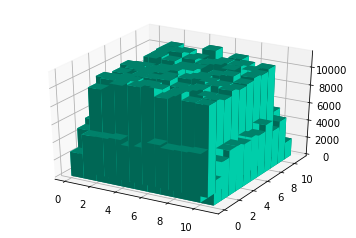

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = grid_freq.grid_x
ypos = grid_freq.grid_y
zpos = np.zeros(len(grouped_grid))

dx = np.ones(len(grouped_grid))
dy = np.ones(len(grouped_grid))
dz = grid_freq[0]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')

plt.show()

In [29]:
print('Calculate hour, weekday, month and year for train and test')
df_train['hour'] = (df_train['time']//60)%24+1 # 1 to 24
df_train['weekday'] = (df_train['time']//1440)%7+1
df_train['month'] = (df_train['time']//43200)%12+1 # rough estimate, month = 30 days
df_train['year'] = (df_train['time']//525600)+1 

Calculate hour, weekday, month and year for train and test


In [30]:
print('group by place_id and get count')
places = df_train[['place_id', 'time']].groupby('place_id').count()

group by place_id and get count


plot weekday Vs hour for 6 place_ids with highest counts


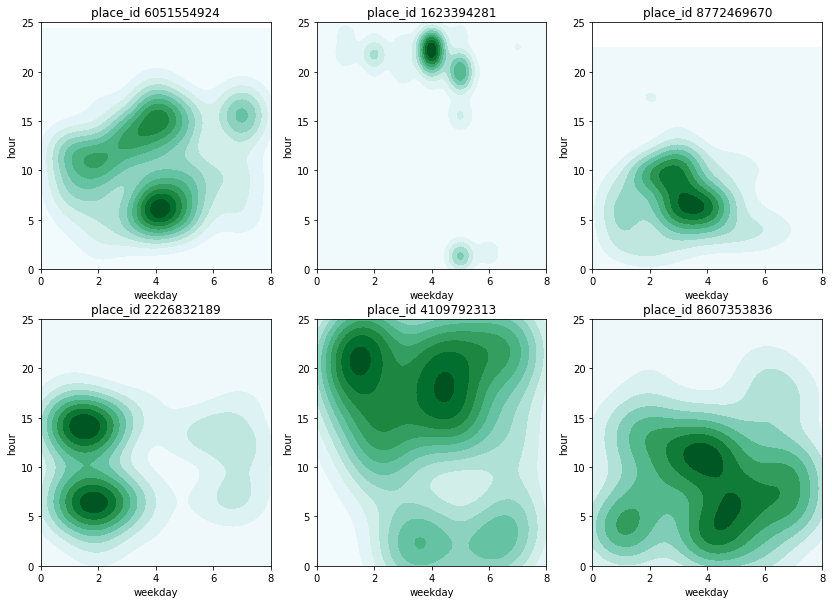

In [32]:
import seaborn as sns

places.rename(columns={'time': 'count'}, inplace=True)

print('plot weekday Vs hour for 6 place_ids with highest counts')
plt.figure(1, figsize=(14,10))
placeindex = places['count'].sort_values(ascending=False)[:6]
for (i, placeid) in enumerate(placeindex.index):
    ax = plt.subplot(2,3,i+1)
    df_train_place = df_train.query('place_id == @placeid')
    # df_train_place = train.query('place_id == @placeid and year==1') # to separate by year      
    sns.kdeplot(df_train_place.weekday, df_train_place.hour, shade=True, ax = ax)
    plt.title("place_id " + str(placeid)) 
    ax.set(xlim=(0, 8))
    ax.set(ylim=(0, 25))

Kdes for weekday Vs hour for 6 place ids with the highest counts. The plots show a preference for certain hours and weekdays for each place id. Maybe weekends and weekdays and holidays can be separated if more place ids are analyzed.

plot weekday Vs month for 6 place_ids with highest counts


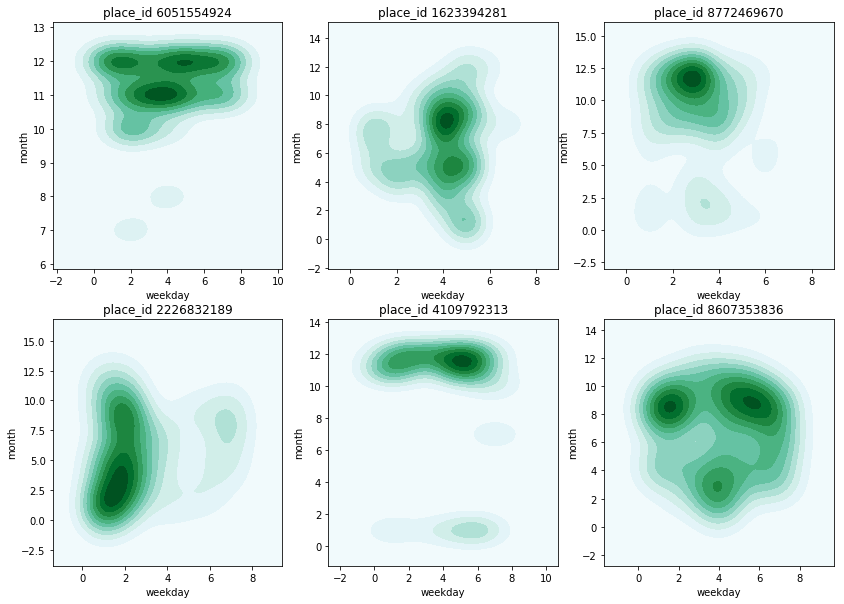

In [33]:
print('plot weekday Vs month for 6 place_ids with highest counts')
plt.figure(2, figsize=(14,10))
placeindex = places['count'].sort_values(ascending=False)[:6]
for (i, placeid) in enumerate(placeindex.index):
    df_train_place = df_train.query('place_id == @placeid and year==1')
    ax = plt.subplot(2,3,i+1)
    sns.kdeplot(df_train_place.weekday, df_train_place.month, shade=True, ax=ax)
    plt.title("place_id " + str(placeid)) 

In [34]:
df_train.head(5)

,row_id,x,y,accuracy,time,place_id,grid_x,grid_y,hour,weekday,month,year
0,0,0.7941,9.0809,54,470702,8523065625,1,9,22,5,11,1
1,1,5.9567,4.7968,13,186555,1757726713,6,5,14,4,5,1
2,2,8.3078,7.0407,74,322648,1137537235,8,7,2,1,8,1
3,3,7.3665,2.5165,65,704587,6567393236,7,3,8,7,5,2
4,4,4.0961,1.1307,31,472130,7440663949,4,1,21,6,11,1


LocationP(place_id) = P(x,y)